<a href="https://colab.research.google.com/github/ravij25/gravity/blob/main/Regional_residual_separation_gravity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/ravij25/gravity/main/kadapa2.csv")

In [3]:
df

,Lat,Long,Bouger anomaly
0,78.0083,17.0032,4.6
1,78.0250,17.0032,3.0
2,78.0417,17.0032,1.4
3,78.0583,17.0032,0.1
4,78.0750,17.0032,-0.9
...,...,...,...
22743,79.9417,14.0003,-32.5
22744,79.9583,14.0003,-32.4
22745,79.9750,14.0003,-32.6
22746,79.9917,14.0003,-33.4


In [4]:
# Extract the data as a numpy array
data = df['Bouger anomaly'].to_numpy()


In [5]:
# Define the filter parameters
nyquist_freq = 0.5 * len(data) / (df.index[-1] - df.index[0])
cutoff_freq = 0.02 * nyquist_freq
order = 4

In [6]:
# Design and apply the Butterworth low-pass filter
b, a = signal.butter(order, cutoff_freq / nyquist_freq, btype='low')
regional_anomaly = signal.filtfilt(b, a, data)

In [7]:
# Subtract the regional anomaly from the original data to obtain the residual anomaly
residual_anomaly = data - regional_anomaly

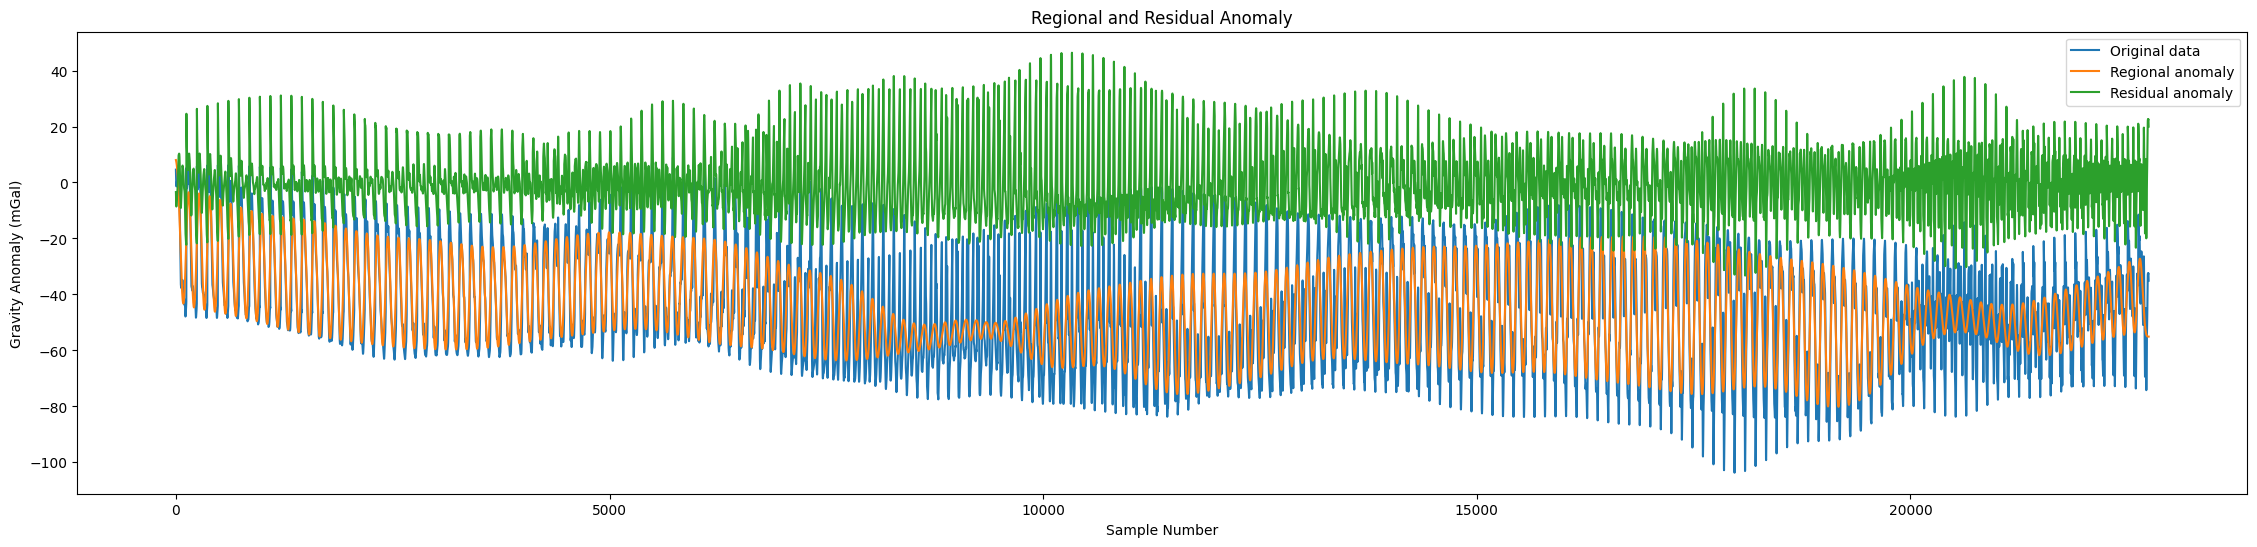

In [8]:
# Plot the original data, the regional anomaly, and the residual anomaly
plt.figure(figsize=(28, 6))
plt.plot(df.index, data, label='Original data')
plt.plot(df.index, regional_anomaly, label='Regional anomaly')
plt.plot(df.index, residual_anomaly, label='Residual anomaly')
plt.legend()
plt.title('Regional and Residual Anomaly')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()

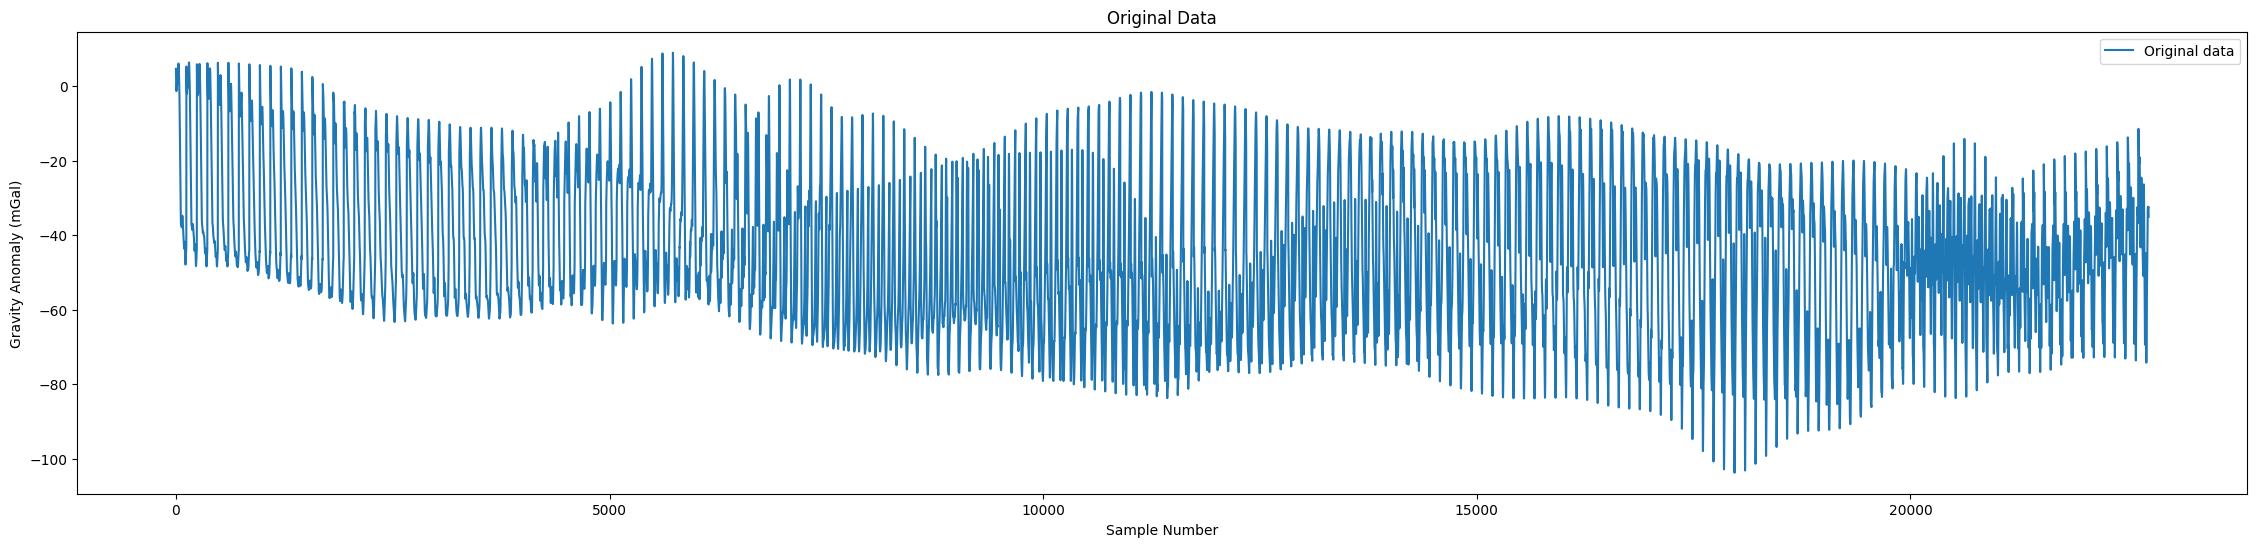

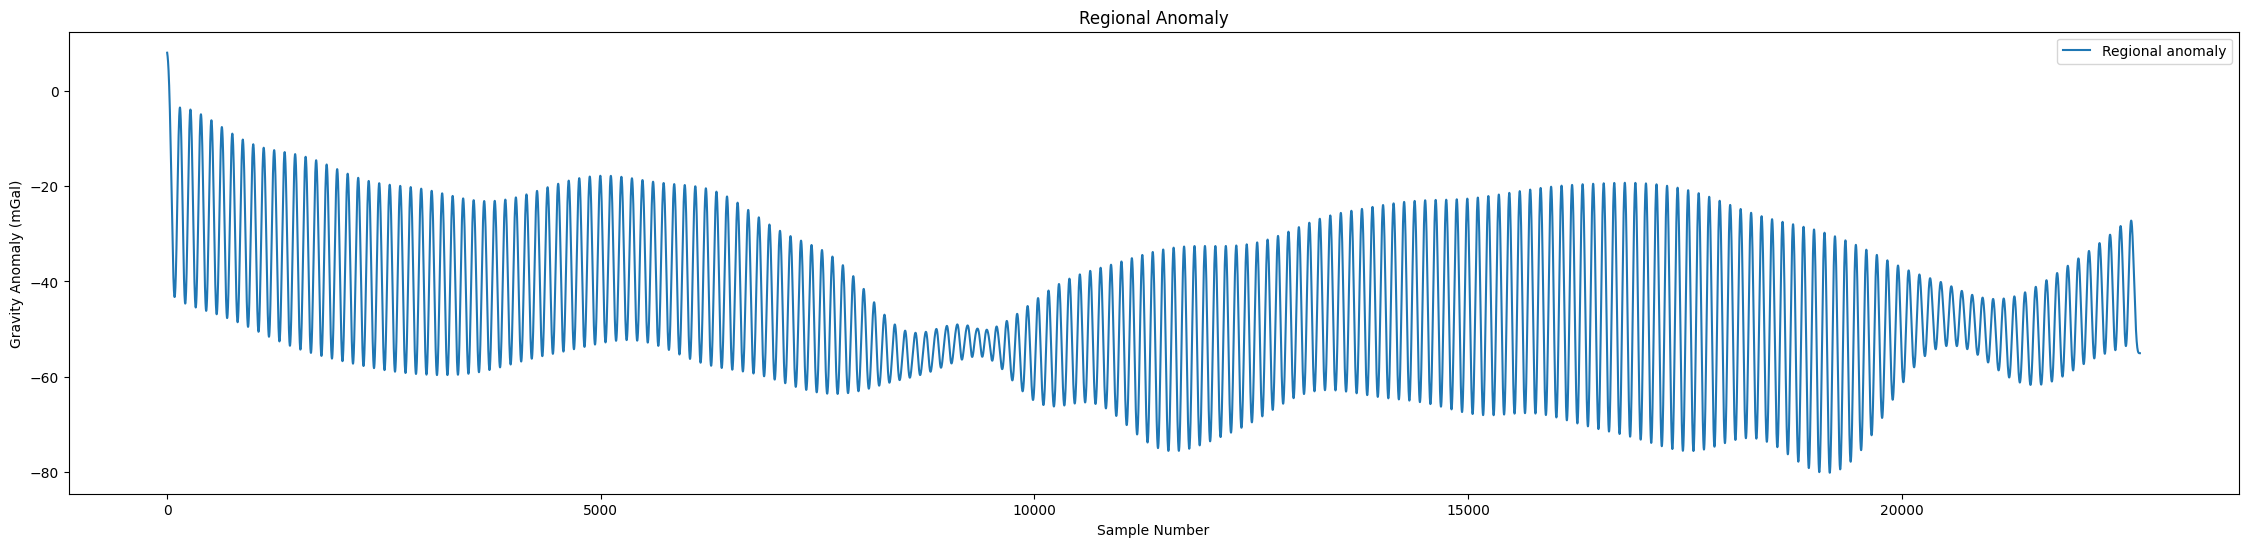

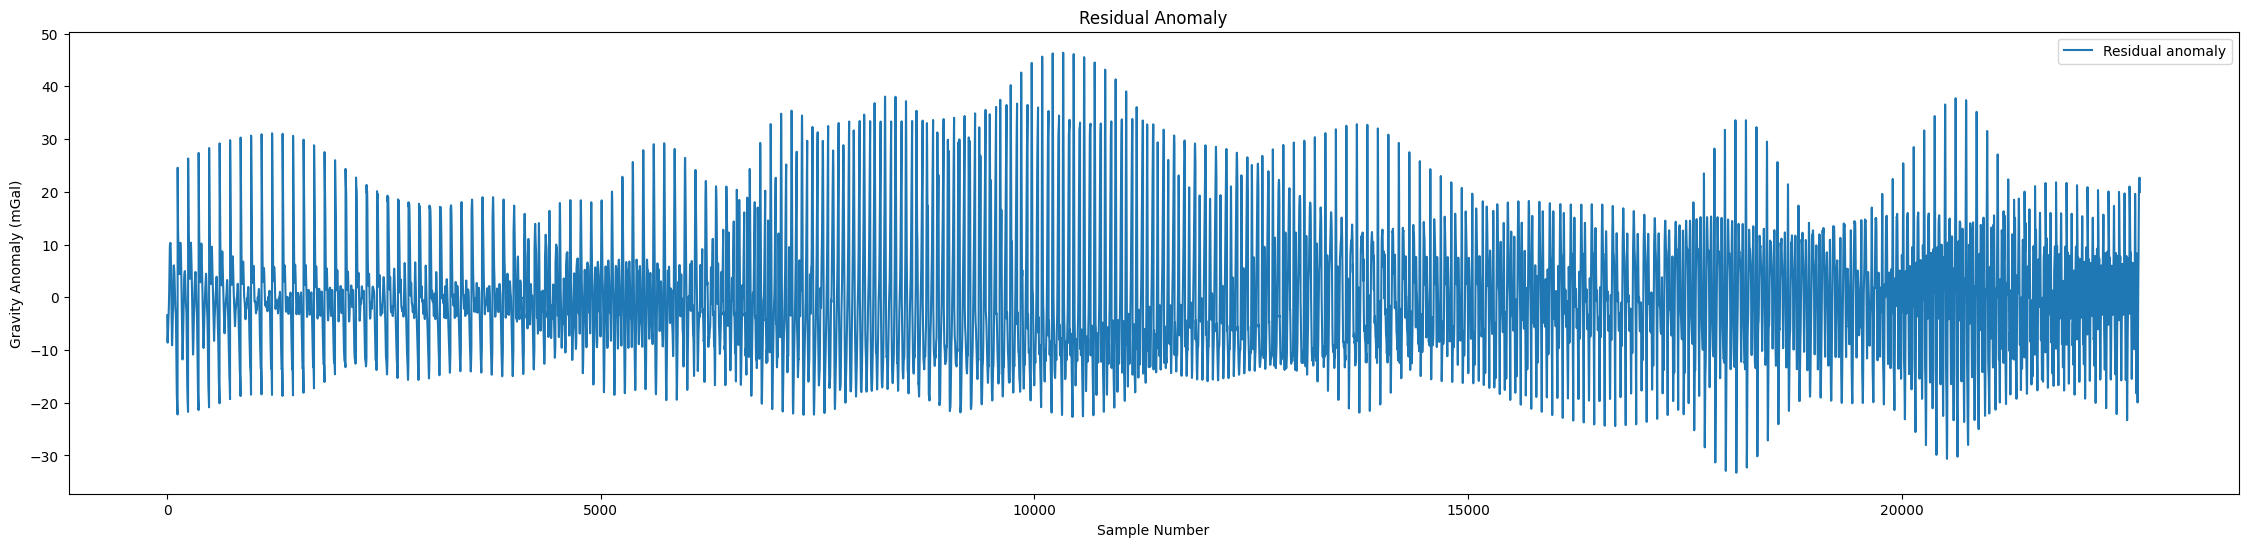

In [9]:
# Plot the original data
plt.figure(figsize=(28, 6))
plt.plot(df.index, data, label='Original data')
plt.legend()
plt.title('Original Data')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()

# Plot the regional anomaly
plt.figure(figsize=(28, 6))
plt.plot(df.index, regional_anomaly, label='Regional anomaly')
plt.legend()
plt.title('Regional Anomaly')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()

# Plot the residual anomaly
plt.figure(figsize=(28, 6))
plt.plot(df.index, residual_anomaly, label='Residual anomaly')
plt.legend()
plt.title('Residual Anomaly')
plt.xlabel('Sample Number')
plt.ylabel('Gravity Anomaly (mGal)')
plt.show()
